In [177]:
from google.colab import drive
drive.mount('/content/drive')

path="/content/drive/MyDrive/Iqram Sir/Tinnitus_ALR_features_130.csv"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [178]:
import numpy as np
import pandas as pd
dataset=pd.read_csv(path)

# New Section

In [179]:
dataset.head(5)

,Subject Type,Test Type,Gap duration,n0_gap_peak_ms,p1_gap_peak_ms,n1_gap_peak_ms,p2_gap_peak_ms,n2_gap_peak_ms,p3_gap_peak_ms,n0_nogap_peak_ms,...,fft_nogap_beta_peak_freq,fft_nogap_gamma_peak_amp,fft_nogap_gamma_peak_freq,fft_nogap_alpha_auc,fft_nogap_beta_auc,fft_nogap_gamma_auc,fft_nogap_total_auc,fft_nogap_alpha_peak_auc,fft_nogap_beta_peak_auc,fft_nogap_gamma_peak_auc
0,Healthy,Test,20ms,101,147,214,263,366,442,105,...,20.751953,0.038292,33.935547,15.285080,10.327331,1.672325,86.663602,1.333714,0.940225,0.074033
1,Healthy,Test,20ms,132,155,217,301,383,514,131,...,21.972656,0.118686,35.644531,15.548298,10.137840,3.010325,79.939031,1.775618,0.665121,0.227634
2,Healthy,Test,20ms,107,160,221,305,396,535,128,...,18.310547,0.048787,41.015625,13.078348,8.643543,2.167986,48.851014,1.769573,0.618907,0.093239
3,Healthy,Test,20ms,77,200,233,268,379,570,166,...,16.357422,0.062302,39.306641,7.087050,5.196947,3.325309,47.181061,0.831445,0.453683,0.119996
4,Healthy,Test,20ms,153,128,224,264,337,562,147,...,16.845703,0.100706,32.958984,15.198039,11.166206,2.334388,45.697755,1.665048,0.845292,0.192855


In [180]:
dataset.iloc[:, 0].value_counts()

Healthy     133
Tinnitus    123
Name: Subject Type, dtype: int64

In [181]:
X = dataset.iloc[:, 3:]
y = dataset.iloc[:, 0]

In [182]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [183]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
 
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#GradientBoosting Classifier

In [184]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RepeatedStratifiedKFold

classifier = GradientBoostingClassifier(n_estimators=4,random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

[[14  9]
 [18 11]]
              precision    recall  f1-score   support

     Healthy       0.44      0.61      0.51        23
    Tinnitus       0.55      0.38      0.45        29

    accuracy                           0.48        52
   macro avg       0.49      0.49      0.48        52
weighted avg       0.50      0.48      0.48        52

Accurecy:  0.4807692307692308


#Random Forest Classifier

In [185]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=18,max_depth=4,random_state=0)
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

[[17  6]
 [13 16]]
              precision    recall  f1-score   support

     Healthy       0.57      0.74      0.64        23
    Tinnitus       0.73      0.55      0.63        29

    accuracy                           0.63        52
   macro avg       0.65      0.65      0.63        52
weighted avg       0.66      0.63      0.63        52

Accurecy:  0.6346153846153846


#Ada Boost Classifier

In [186]:
from sklearn.ensemble import AdaBoostClassifier

classifier = AdaBoostClassifier(n_estimators=54,random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

[[19  4]
 [ 8 21]]
              precision    recall  f1-score   support

     Healthy       0.70      0.83      0.76        23
    Tinnitus       0.84      0.72      0.78        29

    accuracy                           0.77        52
   macro avg       0.77      0.78      0.77        52
weighted avg       0.78      0.77      0.77        52

Accurecy:  0.7692307692307693


#XG

In [187]:


import xgboost as xgb
xgb_classifier = xgb.XGBClassifier(max_depth=3,random_state=0)
xgb_classifier.fit(X_train,y_train)
y_pred = xgb_classifier.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

[[18  5]
 [ 7 22]]
              precision    recall  f1-score   support

     Healthy       0.72      0.78      0.75        23
    Tinnitus       0.81      0.76      0.79        29

    accuracy                           0.77        52
   macro avg       0.77      0.77      0.77        52
weighted avg       0.77      0.77      0.77        52

Accurecy:  0.7692307692307693


#KNN

In [188]:
from sklearn.neighbors import KNeighborsClassifier
KNN_class = KNeighborsClassifier(n_neighbors=164)
KNN_class.fit(X_train, y_train)
y_pred=KNN_class.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

[[23  0]
 [29  0]]
              precision    recall  f1-score   support

     Healthy       0.44      1.00      0.61        23
    Tinnitus       0.00      0.00      0.00        29

    accuracy                           0.44        52
   macro avg       0.22      0.50      0.31        52
weighted avg       0.20      0.44      0.27        52

Accurecy:  0.4423076923076923


Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


#With Synthetic Data

**GradientBoosting**

NON RANDOM

In [189]:

from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier


X, y = make_classification(random_state=0)

model_5 = GradientBoostingClassifier(n_estimators=9,max_depth=3,random_state=0)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)

n_scores = cross_val_score(model_5, X, y, scoring='accuracy', cv=cv)

print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Mean Accuracy: 0.883 (0.097)


Random

In [190]:

from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier

X, y = make_classification(random_state=1)

model_5 = GradientBoostingClassifier(n_estimators=9,max_depth=3,random_state=0)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)

n_scores = cross_val_score(model_5, X, y, scoring='accuracy', cv=cv)

print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Mean Accuracy: 0.953 (0.050)


#USING SMOTE

In [191]:
X = dataset.iloc[:, 3:]
y = dataset.iloc[:, 0]


from sklearn.model_selection import train_test_split
  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
  

In [192]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

**Gradient Boosting**

In [193]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RepeatedStratifiedKFold

classifier = GradientBoostingClassifier(n_estimators=4,random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

[[14  9]
 [18 11]]
              precision    recall  f1-score   support

     Healthy       0.44      0.61      0.51        23
    Tinnitus       0.55      0.38      0.45        29

    accuracy                           0.48        52
   macro avg       0.49      0.49      0.48        52
weighted avg       0.50      0.48      0.48        52

Accurecy:  0.4807692307692308


**Random Forest**

In [194]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=18,max_depth=4,random_state=0)
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

[[17  6]
 [13 16]]
              precision    recall  f1-score   support

     Healthy       0.57      0.74      0.64        23
    Tinnitus       0.73      0.55      0.63        29

    accuracy                           0.63        52
   macro avg       0.65      0.65      0.63        52
weighted avg       0.66      0.63      0.63        52

Accurecy:  0.6346153846153846


**Ada Boosting**

In [195]:
from sklearn.ensemble import AdaBoostClassifier 

classifier = AdaBoostClassifier(n_estimators=54,random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

[[19  4]
 [ 8 21]]
              precision    recall  f1-score   support

     Healthy       0.70      0.83      0.76        23
    Tinnitus       0.84      0.72      0.78        29

    accuracy                           0.77        52
   macro avg       0.77      0.78      0.77        52
weighted avg       0.78      0.77      0.77        52

Accurecy:  0.7692307692307693


#SHAP Explanation


In [196]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [197]:
import shap

In [198]:

from sklearn.preprocessing import LabelEncoder

dataset = pd.read_csv(path)

encoder=LabelEncoder()
dataset["Subject Type"]=encoder.fit_transform(dataset["Subject Type"])


X = dataset.iloc[:, 3:]
y = dataset.iloc[:, 0]





from sklearn.model_selection import train_test_split
  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
  

features_names=list(dataset.iloc[0:0, 3:])
print(features_names)




['n0_gap_peak_ms', 'p1_gap_peak_ms', 'n1_gap_peak_ms', 'p2_gap_peak_ms', 'n2_gap_peak_ms', 'p3_gap_peak_ms', 'n0_nogap_peak_ms', 'p1_nogap_peak_ms', 'n1_nogap_peak_ms', 'p2_nogap_peak_ms', 'n2_nogap_peak_ms', 'p3_nogap_peak_ms', 'n0p1_interval_gap', 'n0n1_interval_gap', 'n0p2_interval_gap', 'n0n2_interval_gap', 'n0p3_interval_gap', 'p1n1_interval_gap', 'p1p2_interval_gap', 'p1n2_interval_gap', 'p1p3_interval_gap', 'n1p2_interval_gap', 'n1n2_interval_gap', 'n1p3_interval_gap', 'p2n2_interval_gap', 'p2p3_interval_gap', 'n2p3_interval_gap', 'n0p1_interval_nogap', 'n0n1_interval_nogap', 'n0p2_interval_nogap', 'n0n2_interval_nogap', 'n0p3_interval_nogap', 'p1n1_interval_nogap', 'p1p2_interval_nogap', 'p1n2_interval_nogap', 'p1p3_interval_nogap', 'n1p2_interval_nogap', 'n1n2_interval_nogap', 'n1p3_interval_nogap', 'p2n2_interval_nogap', 'p2p3_interval_nogap', 'n2p3_interval_nogap', 'n0_gap_peak_amp', 'p1_gap_peak_amp', 'n1_gap_peak_amp', 'p2_gap_peak_amp', 'n2_gap_peak_amp', 'p3_gap_peak_amp

**Gradient Boosting**

In [199]:
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.preprocessing import LabelEncoder
classifier = GradientBoostingClassifier(n_estimators=4,random_state=0)
classifier.fit(X_train, y_train)




GradientBoostingClassifier(n_estimators=4, random_state=0)

In [200]:
explainer = shap.Explainer(classifier.predict, X_test)

shap_values = explainer( X_test)

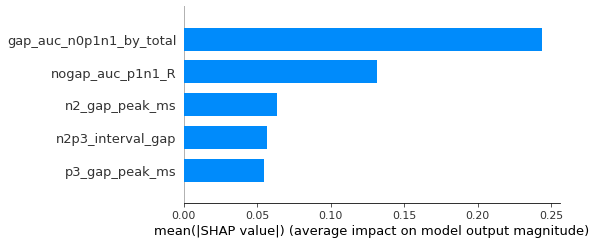

In [201]:
shap.summary_plot(shap_values, X, plot_type="bar",max_display=5,feature_names=features_names)

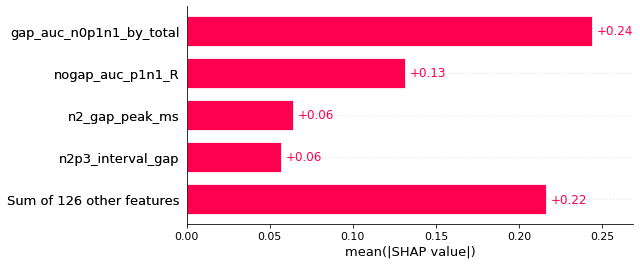

In [202]:
shap.plots.bar(shap_values,max_display=5)

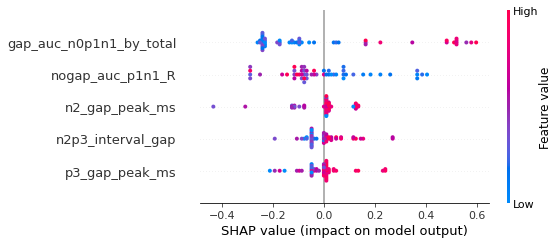

In [203]:
shap.summary_plot(shap_values,max_display=5,feature_names=features_names)

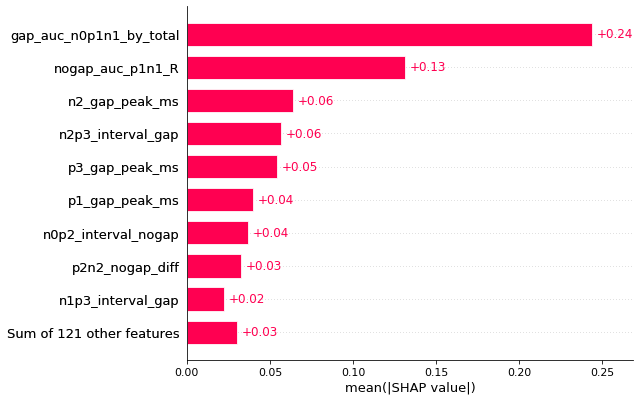

In [204]:
shap.plots.bar(shap_values)

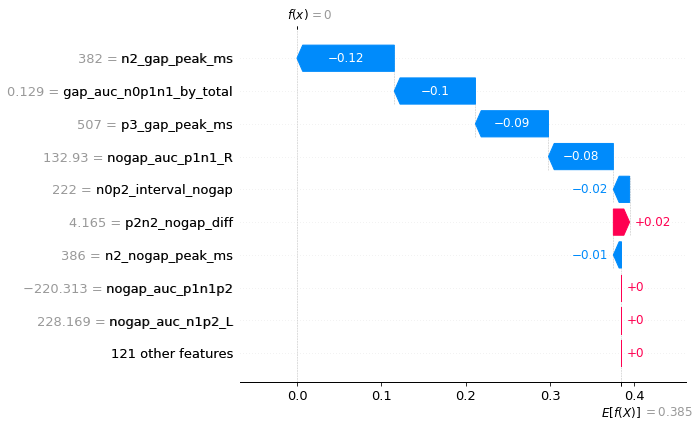

In [205]:
shap.plots.waterfall(shap_values[0])

In [206]:
shap.initjs()
shap.plots.force(shap_values[0],feature_names=features_names)

In [207]:
#explainer = shap.SamplingExplainer(KNN_class,X_test)
explainer = shap.KernelExplainer(classifier.predict_proba, X_train)
start_index = 1
end_index = 2
shap_values = explainer.shap_values(X_test[start_index:end_index])

X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names


  0%|          | 0/1 [00:00<?, ?it/s]

X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessin

In [208]:
shap.initjs()
# Force plot
prediction = classifier.predict(X_test[start_index:end_index])[0]
print(f"The  predicted: {prediction}")
shap.force_plot(explainer.expected_value[1],
                shap_values[1],
                X_test[start_index:end_index],feature_names=features_names)

The  predicted: 0


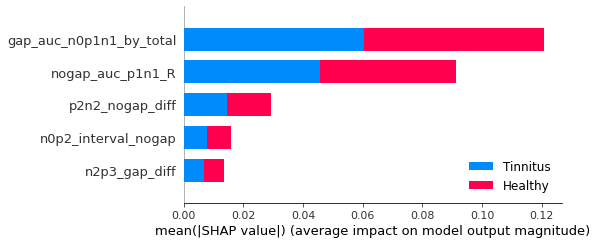

In [209]:
shap.summary_plot(shap_values, X_test[start_index:end_index], plot_type="bar",class_names=['Healthy','Tinnitus'],max_display=5,feature_names=features_names)

**Ada Boosting**

In [210]:
from sklearn.ensemble import AdaBoostClassifier

classifier = AdaBoostClassifier(n_estimators=54,random_state=0)
classifier.fit(X_train, y_train)


AdaBoostClassifier(n_estimators=54, random_state=0)

In [211]:
explainer = shap.Explainer(classifier.predict, X_test)

shap_values = explainer( X_test)

Permutation explainer: 53it [00:45,  1.26s/it]


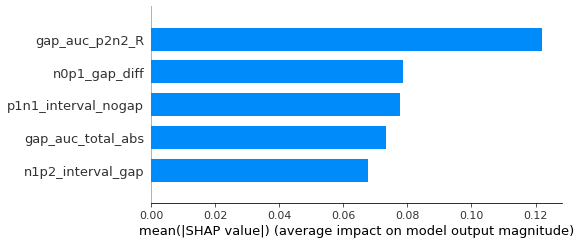

In [212]:
shap.summary_plot(shap_values, X, plot_type="bar",max_display=5,feature_names=features_names)

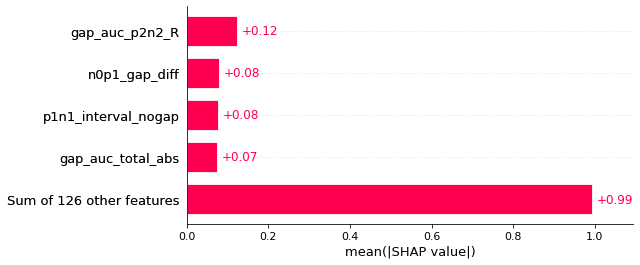

In [213]:
shap.plots.bar(shap_values,max_display=5)

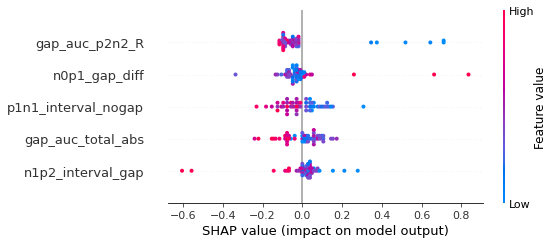

In [214]:
shap.summary_plot(shap_values,max_display=5,feature_names=features_names)

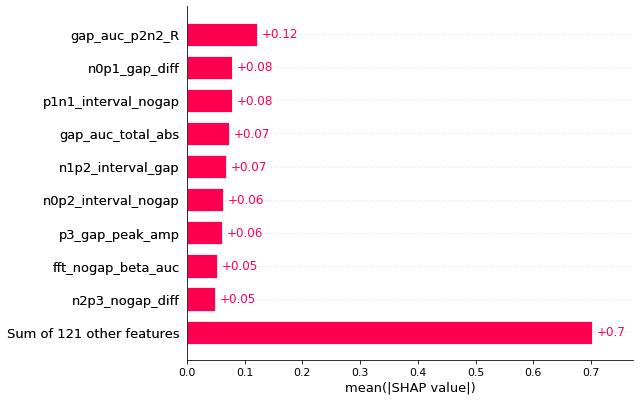

In [215]:
shap.plots.bar(shap_values)

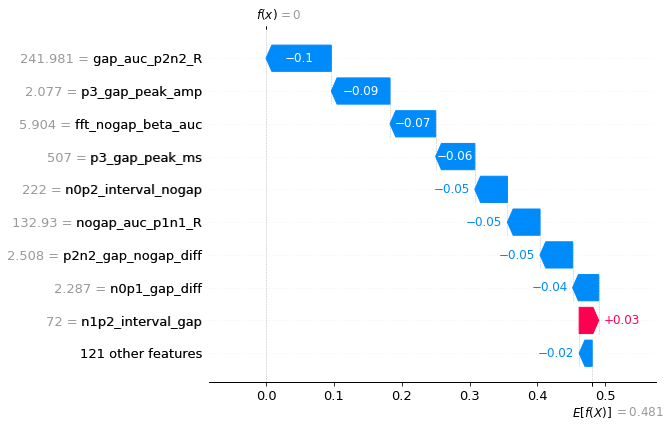

In [216]:
shap.plots.waterfall(shap_values[0])

In [217]:
shap.initjs()
shap.plots.force(shap_values[0],feature_names=features_names)

In [218]:
#explainer = shap.SamplingExplainer(KNN_class,X_test)
explainer = shap.KernelExplainer(classifier.predict_proba, X_train)
start_index = 1
end_index = 2
shap_values = explainer.shap_values(X_test[start_index:end_index])

X does not have valid feature names, but AdaBoostClassifier was fitted with feature names


  0%|          | 0/1 [00:00<?, ?it/s]

X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To repr

In [219]:
shap.initjs()
# Force plot
prediction = classifier.predict(X_test[start_index:end_index])[0]
print(f"The  predicted: {prediction}")
shap.force_plot(explainer.expected_value[1],
                shap_values[1],
                X_test[start_index:end_index],feature_names=features_names)

The  predicted: 0


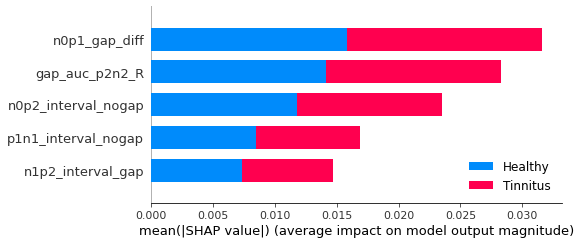

In [220]:
shap.summary_plot(shap_values, X_test[start_index:end_index], plot_type="bar",class_names=['Healthy','Tinnitus'],max_display=5,feature_names=features_names)

**Random Forest**

In [221]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=18,max_depth=4,random_state=0)
classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, n_estimators=18, random_state=0)

In [222]:
explainer = shap.Explainer(classifier.predict, X_test)

shap_values = explainer( X_test)

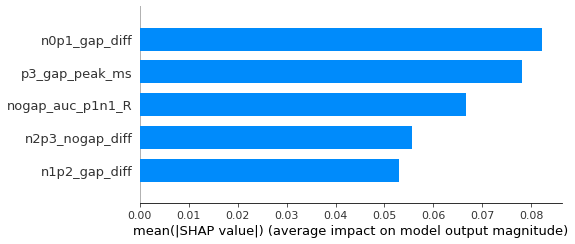

In [223]:
shap.summary_plot(shap_values, X, plot_type="bar",max_display=5,feature_names=features_names)

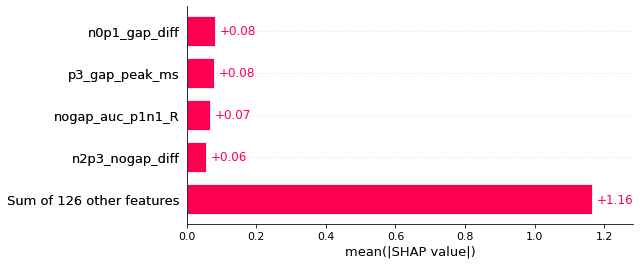

In [224]:
shap.plots.bar(shap_values,max_display=5)

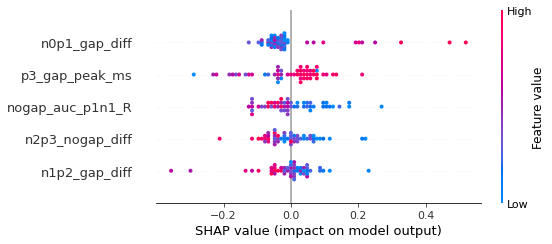

In [225]:
shap.summary_plot(shap_values,max_display=5,feature_names=features_names)

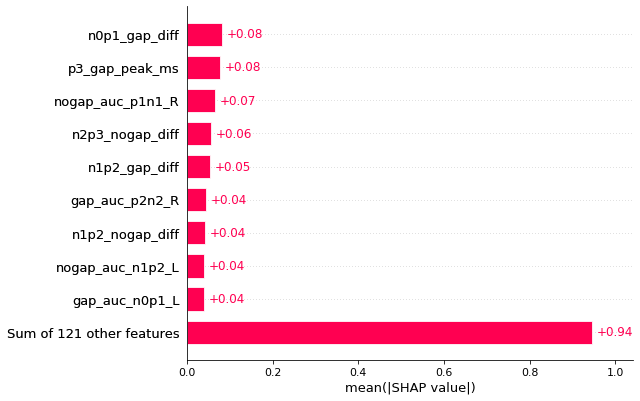

In [226]:
shap.plots.bar(shap_values)

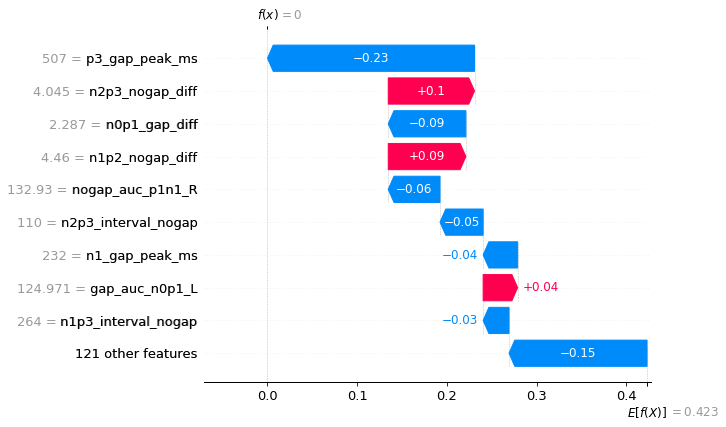

In [227]:
shap.plots.waterfall(shap_values[0])

In [228]:
shap.initjs()
shap.plots.force(shap_values[0],feature_names=features_names)

In [229]:
#explainer = shap.SamplingExplainer(KNN_class,X_test)
explainer = shap.KernelExplainer(classifier.predict_proba, X_train)
start_index = 1
end_index = 2
shap_values = explainer.shap_values(X_test[start_index:end_index])

X does not have valid feature names, but RandomForestClassifier was fitted with feature names


  0%|          | 0/1 [00:00<?, ?it/s]

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage.

In [230]:
shap.initjs()
# Force plot
prediction = classifier.predict(X_test[start_index:end_index])[0]
print(f"The  predicted: {prediction}")
shap.force_plot(explainer.expected_value[1],
                shap_values[1],
                X_test[start_index:end_index],feature_names=features_names)

The  predicted: 0


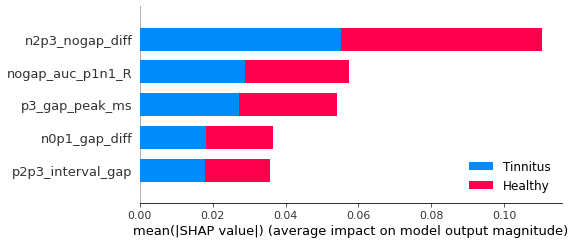

In [231]:
shap.summary_plot(shap_values, X_test[start_index:end_index], plot_type="bar",class_names=['Healthy','Tinnitus'],max_display=5,feature_names=features_names)

#ROC Plot

In [232]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

dataset = pd.read_csv(path)

encoder=LabelEncoder()
dataset["Subject Type"]=encoder.fit_transform(dataset["Subject Type"])


X = dataset.iloc[:, 3:]
y = dataset.iloc[:, 0]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2,random_state=0)


from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
 
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [233]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RepeatedStratifiedKFold

gb = GradientBoostingClassifier(n_estimators=4,random_state=0)
gb.fit(X_train, y_train)


GradientBoostingClassifier(n_estimators=4, random_state=0)

In [234]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=18,max_depth=4,random_state=0)
rf.fit(X_train, y_train)


RandomForestClassifier(max_depth=4, n_estimators=18, random_state=0)

In [235]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators=54,random_state=0)
ada.fit(X_train, y_train)


AdaBoostClassifier(n_estimators=54, random_state=0)

In [236]:
r_probs = [0 for _ in range(len(y_test))]
rf_probs = rf.predict_proba(X_test)
gb_probs = gb.predict_proba(X_test)
ada_probs= ada.predict_proba(X_test)

In [237]:
rf_probs = rf_probs[:, 1]
gb_probs = gb_probs[:, 1]
ada_probs=ada_probs[:, 1]

In [238]:
from sklearn.metrics import roc_curve, roc_auc_score

In [239]:
r_auc = roc_auc_score(y_test, r_probs)
rf_auc = roc_auc_score(y_test, rf_probs)
gb_auc = roc_auc_score(y_test, gb_probs)
ada_auc = roc_auc_score(y_test, ada_probs)

In [240]:
r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
gb_fpr, gb_tpr, _ = roc_curve(y_test, gb_probs)
ada_fpr, ada_tpr, _ = roc_curve(y_test, ada_probs)


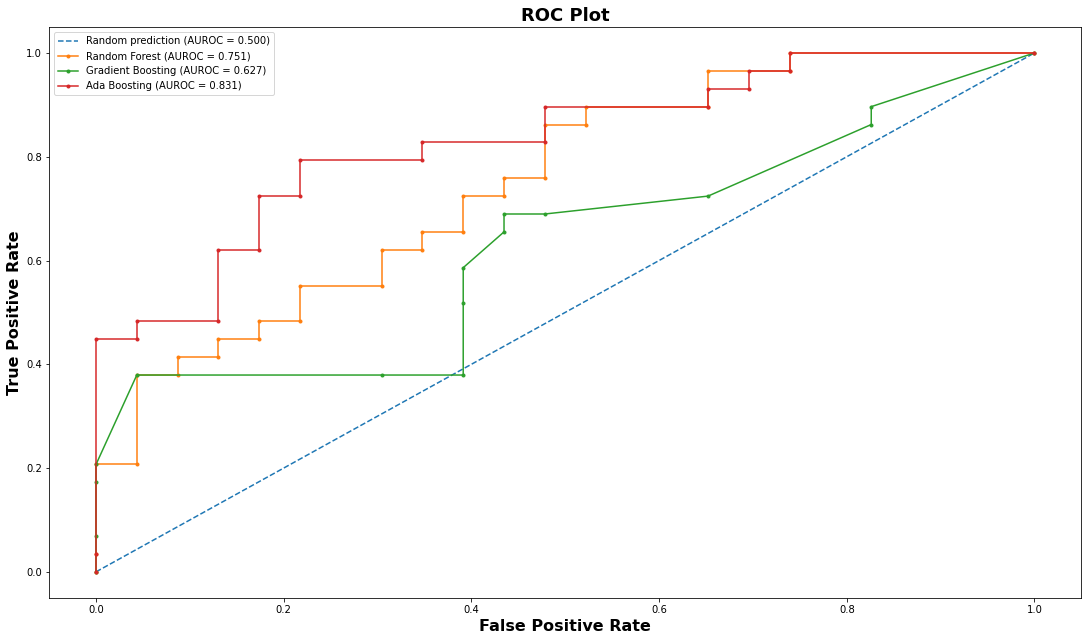

In [241]:
import matplotlib.pyplot as plt
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)
plt.plot(gb_fpr, gb_tpr, marker='.', label='Gradient Boosting (AUROC = %0.3f)' % gb_auc)
plt.plot(ada_fpr, ada_tpr, marker='.', label='Ada Boosting (AUROC = %0.3f)' % ada_auc)

# Title
plt.title('ROC Plot',fontsize= 18, fontweight='bold')
plt.xlabel('False Positive Rate',fontweight='bold',fontsize=16)
plt.ylabel('True Positive Rate',fontweight='bold',fontsize=16)
plt.legend() 
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig('ROC.png', dpi=100)
plt.show()